This copy is to try to make augmentation work correctly, with no data leakage and with functioning translation. However, back-translation is not working. Faizan's original code did not function at all, while attempts to use other libraries to translate failed due to long runtime (over 13.5 hours and still failed) and statements over 5000 characters. Thus, this code is not pushed to the repo.

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import plotly.figure_factory as ff
from textblob import TextBlob
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Load the data
path = './kaggle_sentiment_data.csv'
df = pd.read_csv(path)

In [ ]:
# Display the first few rows of the dataframe
print(df.head())

   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


In [ ]:
# EDA
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


In [ ]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Unnamed: 0      0
statement     362
status          0
dtype: int64


In [ ]:
# Distribution of target labels
fig = px.histogram(df, x='status', title='Distribution of Mental Health Status')
fig.show()

In [ ]:
# Handle NaN values in the statement column
df['statement'] = df['statement'].fillna('')

In [ ]:
# Text Length Distribution
df['text_length'] = df['statement'].apply(lambda x: len(str(x).split()))
fig = px.histogram(df, x='text_length', title='Text Length Distribution')
fig.show()

In [ ]:
# Remove links, HTML tags, etc. 
def remove_non_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove links
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'\n', '', text)  # Remove newlines
    return text

df['cleaned_statement'] = df['statement'].apply(lambda x: remove_non_text(x))

# Train_test_split
X = df['cleaned_statement']
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train[:], y_train[:])

(42434,) (10609,) (42434,) (10609,)
52275    how do you make eye contact with people? i rea...
49099    balancing school, social life and work how to ...
10636    weed made me motivated and happy again. motivated
23796    24/7 i cringe at my past thoughts omg its so p...
48863                                                     
                               ...                        
11284    i used to be a very confident, cheerful person...
44732    spanx except i missed last week s lee and now ...
38158    tl dr have been abused mentally and physically...
860                          do i sell the tutorial again?
15795    i am not religious but do believe in god. but ...
Name: cleaned_statement, Length: 42434, dtype: object 52275       Anxiety
49099        Stress
10636    Depression
23796      Suicidal
48863        Stress
            ...    
11284    Depression
44732        Normal
38158    Depression
860          Normal
15795      Suicidal
Name: status, Length: 42434, dtype: objec

In [ ]:
# Data Augmentation
def augment_text(text):
    try:
        blob = TextBlob(text)
        translated = blob.translate(to='fr').translate(to='en')
        print("success: ", translated)
        return str(translated)
    except Exception as e:
        print("failed")
        return text

# df['augmented_statement'] = df['statement'].apply(augment_text)
# augmented_df = df[['statement', 'status']].copy()
# augmented_df['statement'] = df['augmented_statement']
# df = pd.concat([df, augmented_df])

# df['augmented_statement'] = X_train.apply(augment_text)
# augmented_df = df[['statement', 'status']].copy()
# augmented_df['statement'] = df['augmented_statement']
# df = pd.concat([df, augmented_df])

augmented_df = pd.concat([X_train, y_train], axis=1)
print(augmented_df.head())
augmented_df['cleaned_statement'] = X_train.apply(augment_text)
print(augmented_df.tail())

                                       cleaned_statement      status
52275  how do you make eye contact with people? i rea...     Anxiety
49099  balancing school, social life and work how to ...      Stress
10636  weed made me motivated and happy again. motivated  Depression
23796  24/7 i cringe at my past thoughts omg its so p...    Suicidal
48863                                                         Stress
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
faile

In [ ]:
# Data Preprocessing (removing punctuation, numbers, and stopwords)
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):    
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

df['cleaned_statement'] = df['cleaned_statement'].apply(lambda x: preprocess_text(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahuan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahuan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Tokenization and Stopwords Removal
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_statement'] = df['cleaned_statement'].apply(lambda x: remove_stopwords(x))

In [ ]:
# Reapply preprocessing on augmented data
augmented_df['cleaned_statement'] = augmented_df['cleaned_statement'].apply(lambda x: preprocess_text(x))
augmented_df['cleaned_statement'] = augmented_df['cleaned_statement'].apply(lambda x: remove_stopwords(x))

KeyboardInterrupt: 

In [ ]:
# Ensure no NaN values are left
augmented_df['cleaned_statement'] = augmented_df['cleaned_statement'].fillna('')

In [ ]:
# Add augmented data to X_train and y_train
X_train = pd.concat([X_train, augmented_df['cleaned_statement']])
y_train = pd.concat([y_train, augmented_df['status']])


print(X_train.tail(5))
print(y_train.tail(5))
print(X_train.shape)
print(y_train.shape)

11284    used confident cheerful person today become aw...
44732       spanx except missed last week lee gone iplayer
38158    tl dr abused mentally physically parent throug...
860                                          sell tutorial
15795    religious believe god herei want cease exist b...
Name: cleaned_statement, dtype: object
11284    Depression
44732        Normal
38158    Depression
860          Normal
15795      Suicidal
Name: status, dtype: object
(84868,)
(84868,)


In [ ]:
# Vectorization
vectorizer = TfidfVectorizer(max_features=10000)  
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Model Training with Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Best Model
best_model = grid_search.best_estimator_

In [ ]:
# Predictions
y_pred = best_model.predict(X_test_tfidf)

In [ ]:
# Evaluation
print("Best Parameters:")
print(grid_search.best_params_)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters:
{'C': 100}
Accuracy Score:
0.697709491940805
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.74      0.74      0.74       779
             Bipolar       0.73      0.69      0.71       580
          Depression       0.66      0.65      0.65      3100
              Normal       0.85      0.84      0.85      3327
Personality disorder       0.54      0.54      0.54       248
              Stress       0.52      0.50      0.51       557
            Suicidal       0.56      0.58      0.57      2018

            accuracy                           0.70     10609
           macro avg       0.66      0.65      0.65     10609
        weighted avg       0.70      0.70      0.70     10609



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_fig = ff.create_annotated_heatmap(
    z=cm,
    x=list(set(y_test)),
    y=list(set(y_test)),
    annotation_text=cm,
    colorscale='Viridis'
)
cm_fig.update_layout(title='Confusion Matrix')
cm_fig.update_layout(title='Confusion Matrix', width=800, height=600)  
cm_fig.show()

In [ ]:
# Feature Importance
feature_names = vectorizer.get_feature_names_out()
coefs = best_model.coef_
for i, category in enumerate(best_model.classes_):
    top_features = coefs[i].argsort()[-10:]
    top_words = [feature_names[j] for j in top_features]
    top_scores = [coefs[i][j] for j in top_features]
    fig = go.Figure([go.Bar(x=top_words, y=top_scores)])
    fig.update_layout(title=f'Top Features for {category}', width=800, height=400)
    fig.show()

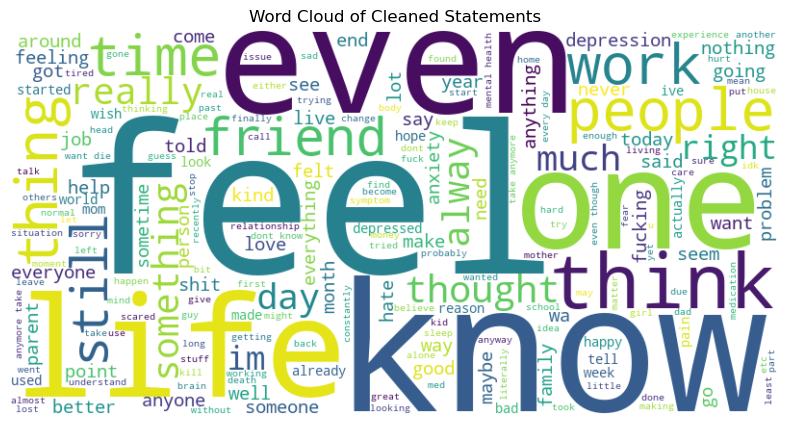

In [ ]:

# Word Cloud
all_text = ' '.join(df['cleaned_statement'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Statements')
plt.show()

In [ ]:
# Status Distribution
fig = px.pie(df, names='status', title='Proportion of Each Status Category')
fig.update_layout(width=800, height=600) 
fig.show()